In [1]:
import pandas as pd

df=pd.read_csv('data.csv')

df

,Sr. No.,Name,Roll No.,Height (in cm),Weight (in kg)
0,1,Vishal Baghel,1,170.00,70.00
1,2,Gautam Chauhan,4,173.00,85.00
2,3,Mohit Dadwani,5,172.00,53.00
3,4,Etiko Solih,7,180.00,65.00
4,5,Aatreyee,13,175.00,80.00
5,6,Aasima,18,167.64,55.00
6,7,Panchal dhruvi,22,164.00,62.00
7,8,Jay Panchal,23,180.00,70.00
8,9,Kaushal Jayeshbhai Panchal,24,183.00,60.00
9,10,Dev Patel,25,170.00,68.00


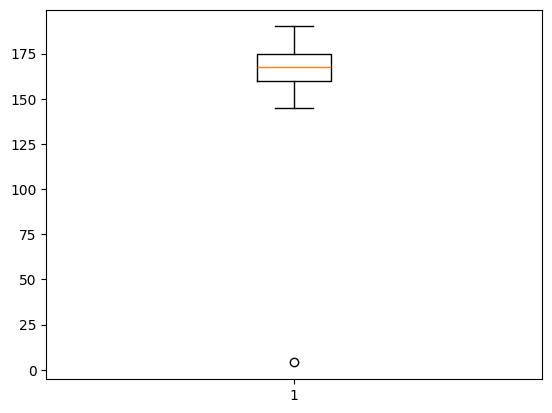

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.boxplot(x=df['Height (in cm)'])
plt.boxplot(df['Height (in cm)'])
plt.show()


In [9]:
q3=df['Height (in cm)'].quantile(0.75)
q1=df['Height (in cm)'].quantile(0.25)

iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

df['Height (in cm)'] = df['Height (in cm)'].clip(lower, upper)

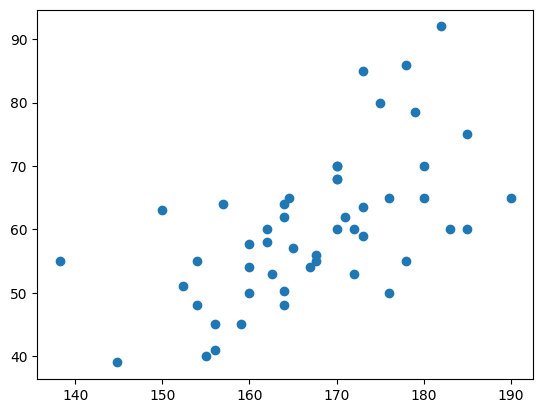

In [11]:
y=df['Weight (in kg)']
x=df['Height (in cm)']

plt.scatter(x,y)
plt.show()


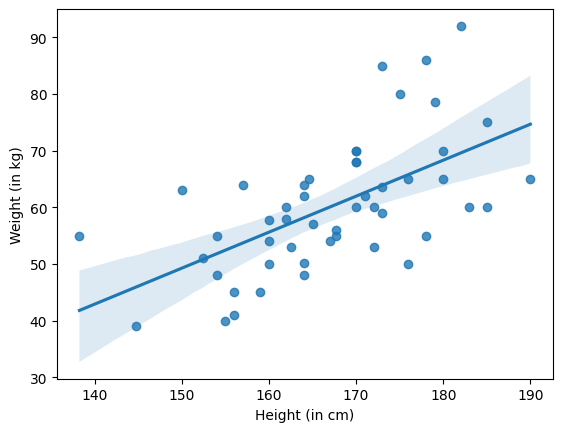

In [12]:
import seaborn as sns

sns.regplot(
    x='Height (in cm)',
    y='Weight (in kg)',
    data=df
)
plt.show()


In [17]:
m=0
sums=0
suma=0
xbar=sum(x)/len(x)
ybar=sum(y)/len(y)

for i in range(len(x)):
    sums+=(x[i]-xbar)*(y[i]-ybar)
    suma+=(x[i]-xbar)**2

m=sums/suma
c=0
c=ybar-m*xbar
(m,c)

(np.float64(0.6350195661156535), np.float64(-45.99989418239676))

In [18]:
from sklearn.linear_model import LinearRegression

X=df[['Height (in cm)']]
y=df['Weight (in kg)']

model=LinearRegression()
model.fit(X,y)

m_s=model.coef_[0]
m_c=model.intercept_

print(m_s,m_c)

0.6350195661156534 -45.999894182396744


In [23]:
df['Weight_p']=m*df['Height (in cm)']+c
df['Weight_p']

0     61.953432
1     63.858491
2     63.223471
3     68.303628
4     65.128530
5     60.454786
6     58.143315
7     68.303628
8     70.208686
9     61.953432
10    50.777088
11    67.033589
12    55.603236
13    53.063158
14    63.858491
15    58.143315
16    61.953432
17    56.873276
18    61.953432
19    52.428139
20    71.478726
21    57.228886
22    54.968217
23    65.763549
24    60.454786
25    58.778334
26    55.603236
27    49.253041
28    53.063158
29    69.573667
30    51.793119
31    65.763549
32    63.858491
33    63.223471
34    61.953432
35    58.143315
36    56.873276
37    71.478726
38    51.793119
39    60.048373
40    45.938239
41    62.588452
42    74.653823
43    67.033589
44    53.698178
45    58.143315
46    58.517976
47    41.791561
48    67.668608
49    55.603236
Name: Weight_p, dtype: float64

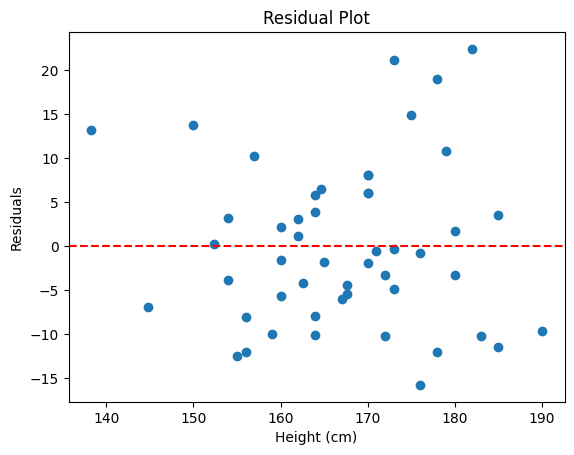

In [25]:
from sklearn.metrics import r2_score
y_pred = model.predict(X)
r2=r2_score(y,y_pred)
residuals = y - y_pred

plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Height (cm)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

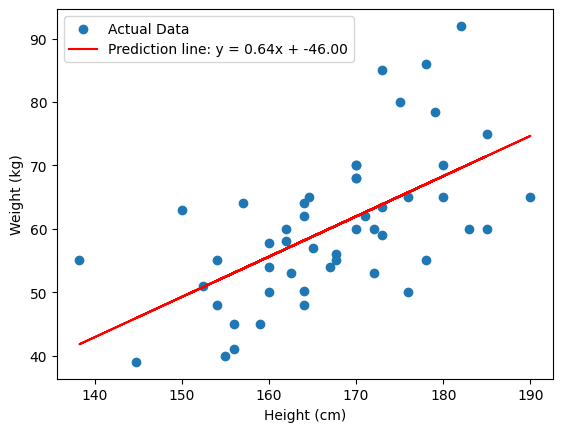

In [30]:
plt.scatter(x, y, label='Actual Data')

plt.plot(
    x,
    y_pred,
    color='red',
    label=f'Prediction line: y = {m:.2f}x + {c:.2f}'
)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()
